I decided to make this notebook for my learning reference after I learned that image NN models often use encoders and decoders in order to minimize image sizes thus reducing better acquiring data for the purpose of model training.

Keeping in mind my goal is to see if compression is possible with ML I think messing around more with this to learn about this mechanisim is a good idea.

In [25]:
#Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [27]:
# Reshape the images to be flat arrays
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [28]:
# Build the autoencoder
input_dim = x_train.shape[1]
encoding_dim = 32

input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_layer)
encoder = tf.keras.layers.Dense(encoding_dim//2, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(encoding_dim//4, activation='relu')(encoder)

decoder = tf.keras.layers.Dense(encoding_dim//2, activation='relu')(encoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='sigmoid')(decoder)

autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=decoder)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

The mechanism of this auto-encoder takes a 784 (28x28) input and then it reduces it to 32 (16x16) and it keeps cutting it to 8 (4x4) then the decoder part has it go to 16 neurons which then send info to 32 and finally back to 784. So if someone wanted to make this work far better, they would add more layers to make the change from 784 to 32 less steep thus losing more information.

Adding more layers does increase the risk of overfitting.

In [29]:
# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
#The above line is commented out because it takes a long time to run. The model is already trained and saved in the next line.
autoencoder.save('autoencoder_model_img.h5')
autoencoder = tf.keras.models.load_model('autoencoder_model_img.h5')

Epoch 1/50
235/235 [==============================] - 4s 15ms/step - loss: 0.2979 - val_loss: 0.2248
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.2077 - val_loss: 0.1919
Epoch 3/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1833 - val_loss: 0.1742
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1724 - val_loss: 0.1687
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1686 - val_loss: 0.1659
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1661 - val_loss: 0.1636
Epoch 7/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1640 - val_loss: 0.1616
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1619 - val_loss: 0.1596
Epoch 9/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1597 - val_loss: 0.1575
Epoch 10/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1579 - val_lo

In [30]:
# Test the autoencoder
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

313/313 [==============================] - 1s 3ms/step


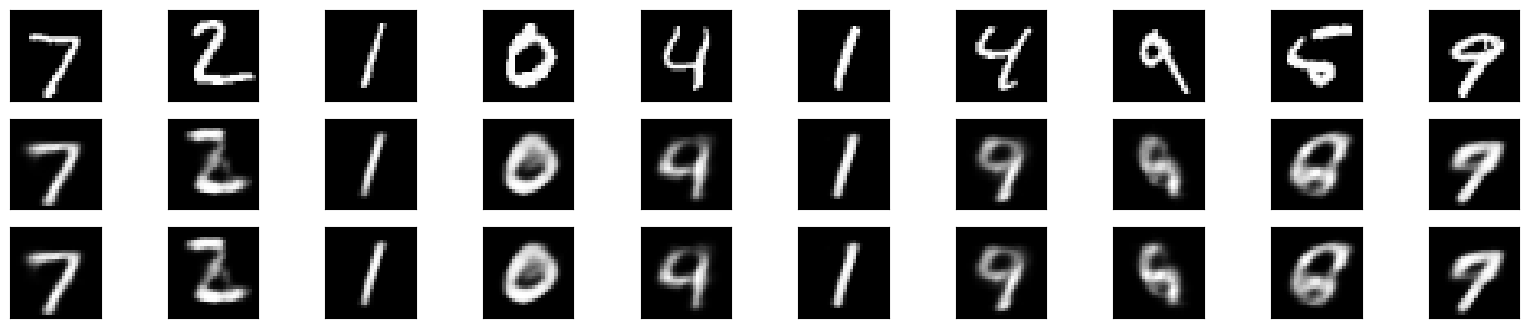

In [31]:
# Visualize original, compressed, and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Compressed image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed image
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

First Row is input.
Second Row is compressed.
Third Row is reconstructed.